In [1]:
import pandas as pd

In [2]:
url = 'https://github.com/eueung/AI-survey2020/raw/master/survey-ai-2020-p.csv'
df  = pd.read_csv(url)

In [3]:
df.tail(3)

,Timestamp,Kategori,Jenjang (Untuk Kategori Mahasiswa),Afiliasi Institusi/Lembaga/PT,Riset/Menekuni Bidang AI sejak,Kategori Bidang AI yang Ditekuni,"Detil Kategori (eg. Robotics, Face/Speech Recognition etc.)",Klaster Riset / Aplikasi AI yg Ditekuni,(Estimasi) Jumlah Publikasi di Bidang AI,Jenis Publikasi di Bidang AI,Jumlah Produk / Startup Bidang AI,Jumlah Paten / Hak Cipta / HKI di Bidang AI,Sumber Pendanaan Aktivitas / Riset (Jika Ada),Catatan/Masukan
37,3/27/2020 17:57:47,Dosen / Peneliti Perguruan Tinggi,NaN,Telkom University,Lebih dari 5 Tahun,"Computer Vision (Facial Recognition, Medical I...","Computer Vision, GAN","Teknologi Informasi dan Komunikasi, wide range...",11-20,"Konferensi, Jurnal, artikel",0 (Belum Ada),1,Institusi atau Universitas,NaN
38,3/27/2020 18:41:21,Dosen / Peneliti Perguruan Tinggi,NaN,Universitas Padjadjaran,Lebih dari 5 Tahun,"Computer Vision (Facial Recognition, Medical I...",Object Detection,"Teknologi Informasi dan Komunikasi, Rekayasa T...",6-10,"Konferensi, Jurnal",3,2,"Institusi atau Universitas, Perusahaan Dalam N...",NaN
39,3/27/2020 21:05:16,Dosen / Peneliti Perguruan Tinggi,NaN,Universitas Kristen Maranatha,2-5 Tahun,"Computer Vision (Facial Recognition, Medical I...",Face Recognitio,Teknologi Informasi dan Komunikasi,3,Jurnal,0 (Belum Ada),0 (Belum Ada),Institusi atau Universitas,NaN


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#df.shape
#df.dtypes

In [6]:
df.isna().sum()

Timestamp                                                       0
Kategori                                                        0
Jenjang (Untuk Kategori Mahasiswa)                             16
Afiliasi Institusi/Lembaga/PT                                   0
Riset/Menekuni Bidang AI sejak                                  0
Kategori Bidang AI yang Ditekuni                                0
Detil Kategori (eg. Robotics, Face/Speech Recognition etc.)     0
Klaster Riset / Aplikasi AI yg Ditekuni                         0
(Estimasi) Jumlah Publikasi di Bidang AI                        0
Jenis Publikasi di Bidang AI                                    5
Jumlah Produk / Startup Bidang AI                               0
Jumlah Paten / Hak Cipta / HKI di Bidang AI                     0
Sumber Pendanaan Aktivitas / Riset (Jika Ada)                   3
Catatan/Masukan                                                29
dtype: int64

---

Text(0, 0.5, '')

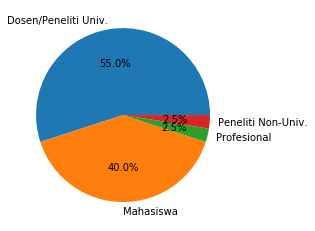

In [7]:
import re

mapdict = {
    'Dosen / Peneliti Perguruan Tinggi' : 'Dosen/Peneliti Univ.',
    'Peneliti Lembaga Non Perguruan Tinggi' : 'Peneliti Non-Univ.',
    'Mahasiswa': 'Mahasiswa',
    'Profesional':'Profesional',
    'Umum/Hobbyist':'Umum',
    'Lainnya':'Lainnya'    
}

a = df['Kategori'].dropna().to_list()

res1=[]
for i in a:
    b = i
    for key,val in mapdict.items():
        b = re.sub(re.escape(key),val,b)
    c = b.strip()
    res1 = res1 + [c]
    
plot = pd.Series(res1).value_counts().plot(kind='pie',autopct='%1.1f%%')
plot.set_ylabel('')

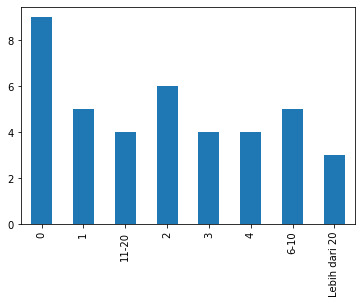

In [8]:
df['(Estimasi) Jumlah Publikasi di Bidang AI '].value_counts().sort_index().plot(kind='bar')

Text(0, 0.5, '')

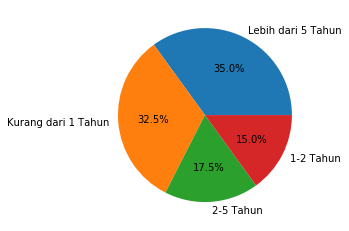

In [9]:
plot = df['Riset/Menekuni Bidang AI sejak'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plot.set_ylabel('')

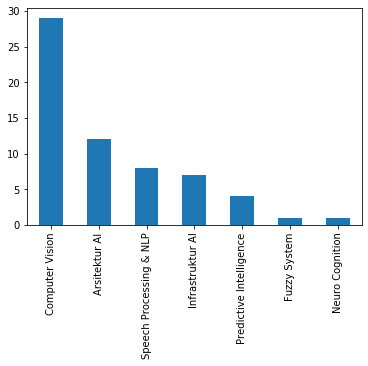

In [10]:
import re
mapdict = {
    'Infrastruktur AI (Hardware, Open Source Frameworks, Syntetic Training Data, Cloud, Edge Computing, etc.)':'Infrastruktur AI',
    'Computer Vision (Facial Recognition, Medical Imaging, Autonomous Navigation, Crop Monitoring, License Plate Recognition, Object Detection/Classification, etc.)':'Computer Vision',
    'Arsitektur AI (GANs, Reinforcement Learning, Federated Learning, Capsule Networks, etc.)':'Arsitektur AI',
    'Speech Processing & NLP (Language Translation, Smart Speaker, Chatbot / Conversational Agent, Sentiment Analysis, E-Commerce Search, etc.)':'Speech Processing & NLP',
    'Predictive Intelligence (Predictive Maintenance, Cyber Threat Hunting, Healthcare Biometric, etc.)':'Predictive Intelligence'
}
invalid_items = [
    'I',
    'yang terkait dengan AI'
]

a = df['Kategori Bidang AI yang Ditekuni'].dropna().to_list()
a = [i.strip() for i in a]

res1=[]
for i in a:
    b = i
    for key,val in mapdict.items():
        b = re.sub(re.escape(key),val,b)
    c = b.strip()
    res1 = res1 + [c]

res2 = []
for i in res1:
    b = i.split(',')
    c = [ j.strip() for j in b]
    res2 = res2 + c
    
for i in invalid_items:
    res2.remove(i)
    
plot = pd.Series(res2).value_counts().plot(kind='bar') 

Text(0, 0.5, '')

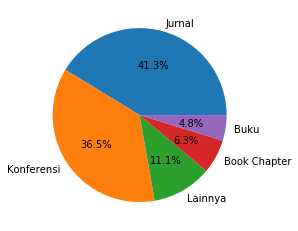

In [11]:
mapdict = {
        'Jurnal' : 'Jurnal',
        'Konferensi' : 'Konferensi',
        'Book Chapter': 'Book Chapter',    
        'Buku': 'Buku'    
}

def mapfunc(x):
    validlist = [ val for key,val in mapdict.items()]
    res = x if x in validlist else 'Lainnya'
    return res

a = df['Jenis Publikasi di Bidang AI'].dropna().to_list()
a = [i.strip() for i in a]
res = []
for i in a:
    b = i.split(',')
    c = [ j.strip() for j in b]
    res = res + c

res = list(map(mapfunc,res))

plot = pd.Series(res).value_counts().plot(kind='pie',autopct='%1.1f%%')
plot.set_ylabel('')

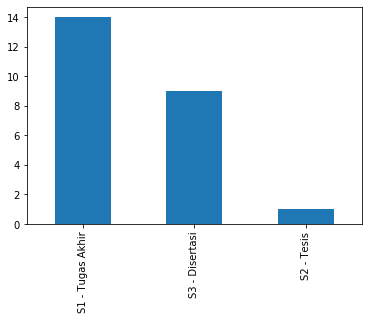

In [12]:
df['Jenjang (Untuk Kategori Mahasiswa)'].value_counts().plot(kind='bar')